In [221]:
path_lwf = '/home/karokaro/research-repositories/FACIL/results/emnist_lwf_final_emnist'

In [222]:
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(path_lwf) if isfile(join(path_lwf, f))]
onlyfiles

['stdout-2025-01-24-10-34.txt',
 'stderr-2025-01-24-11-13.txt',
 'args-2025-01-24-09-52.txt',
 'args-2025-01-24-13-14.txt',
 'raw_log-2025-01-24-13-52.txt',
 'stdout-2025-01-24-12-31.txt',
 'raw_log-2025-01-24-09-10.txt',
 'stderr-2025-01-24-10-34.txt',
 'raw_log-2025-01-24-11-53.txt',
 'args-2025-01-24-11-53.txt',
 'stderr-2025-01-24-11-53.txt',
 'raw_log-2025-01-24-12-31.txt',
 'stderr-2025-01-24-13-14.txt',
 'raw_log-2025-01-24-09-52.txt',
 'args-2025-01-24-12-31.txt',
 'stdout-2025-01-24-11-13.txt',
 'stdout-2025-01-24-14-33.txt',
 'raw_log-2025-01-24-14-33.txt',
 'args-2025-01-24-10-34.txt',
 'args-2025-01-24-13-52.txt',
 'raw_log-2025-01-24-13-14.txt',
 'args-2025-01-24-09-10.txt',
 'stderr-2025-01-24-09-10.txt',
 'stdout-2025-01-24-13-14.txt',
 'stdout-2025-01-24-13-52.txt',
 'stderr-2025-01-24-09-52.txt',
 'raw_log-2025-01-24-10-34.txt',
 'stdout-2025-01-24-11-53.txt',
 'args-2025-01-24-11-13.txt',
 'stderr-2025-01-24-14-33.txt',
 'stderr-2025-01-24-13-52.txt',
 'stdout-2025-01

In [223]:
args = [file for file in onlyfiles if 'args' in file ]
len(args)

9

In [224]:
import json
arg_dict = {}
for file in args:
    with open(join(path_lwf, file), 'r') as f:
        # regex time! we need only the timestamp of the file
        name = file.split('args-')[1]
        arg_dict[name] = json.loads(f.read())

In [225]:
import json

logs = [file for file in onlyfiles if 'raw_log' in file ]

res_dict = {}
for file in logs:
    with open(join(path_lwf, file), 'r') as f:
        name = file.split('raw_log-')[1]
        res_dict[name] = []
        for line in f:
            res_dict[name].append(json.loads(line.strip()))

In [226]:
import numpy as np
seeds = [0, 1, 2]
for seed in seeds:
    small = [key for key in arg_dict if arg_dict[key]["seed"]==seed]
    arg_means = {key:[np.mean([k["value"] for k in res_dict[key] if k["name"]=="acc_tag" and k["group"]=="test" and k["task"] == i]) for i in [12]] for key in small}
    max_key = max(arg_means, key=arg_means.get)
    small.remove(max_key)
    for key in small:
        res_dict.pop(key)
        arg_dict.pop(key)

In [227]:
import pandas as pd
import numpy as np
from itertools import chain
data = pd.DataFrame({'Approach': list(chain.from_iterable([['LWF' for i in range(13)] for key in res_dict.keys()])),
                     'Task': list(chain.from_iterable([[i for i in range(13)] for key in res_dict.keys()])),
                     'Average Accuracy': list(chain.from_iterable([[np.mean([k["value"] for k in res_dict[key] if k["name"]=="acc_taw" and k["group"]=="test" and k["task"] == i]) for i in range(13)] for key in res_dict.keys()])),
                     'Average Forgetting': list(chain.from_iterable([[np.mean([k["value"] for k in res_dict[key] if k["name"]=="forg_taw" and k["group"]=="test" and k["task"] == i and k["iter"] != k["task"]]) for i in range(13)] for key in res_dict.keys()]))})

/home/karokaro/research-repositories/FACIL/venv/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/karokaro/research-repositories/FACIL/venv/lib/python3.11/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


/tmp/ipykernel_17922/1207693049.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot( data,  x='Task', y='Average Accuracy', ci=None)


<Axes: xlabel='Task', ylabel='Average Accuracy'>

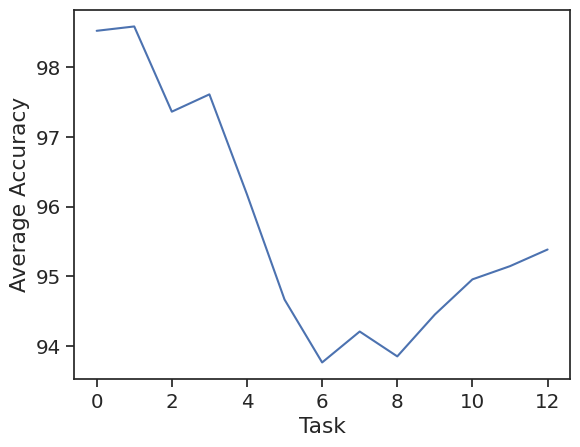

In [228]:
import seaborn as sns
sns.lineplot( data,  x='Task', y='Average Accuracy', ci=None)

In [229]:
data.groupby(['Approach', 'Task']).mean().apply(lambda x: round(x, 2))

Average Accuracy  Average Forgetting
Approach Task                                      
LWF      0                98.52                 NaN
         1                98.58                0.19
         2                97.36                1.90
         3                97.61                1.61
         4                96.18                2.78
         5                94.67                4.58
         6                93.76                5.45
         7                94.21                4.96
         8                93.85                5.32
         9                94.45                4.68
         10               94.96                3.83
         11               95.15                3.69
         12               95.38                3.47

In [230]:
path_ewc = '/home/karokaro/research-repositories/FACIL/results/emnist_ewc_final_emnist'

In [231]:
onlyfiles = [f for f in listdir(path_ewc) if isfile(join(path_ewc, f))]
args = [file for file in onlyfiles if 'args' in file ]
len(args)

9

In [232]:
import json
arg_dict = {}
for file in args:
    with open(join(path_ewc, file), 'r') as f:
        # regex time! we need only the timestamp of the file
        name = file.split('args-')[1]
        arg_dict[name] = json.loads(f.read())

In [233]:
import json

logs = [file for file in onlyfiles if 'raw_log' in file ]

res_dict = {}
for file in logs:
    with open(join(path_ewc, file), 'r') as f:
        name = file.split('raw_log-')[1]
        res_dict[name] = []
        for line in f:
            res_dict[name].append(json.loads(line.strip()))

In [234]:
import numpy as np
seeds = [0, 1, 2]
for seed in seeds:
    small = [key for key in arg_dict if arg_dict[key]["seed"]==seed]
    arg_means = {key:[np.mean([k["value"] for k in res_dict[key] if k["name"]=="acc_tag" and k["group"]=="test" and k["task"] == i]) for i in [12]] for key in small}
    max_key = max(arg_means, key=arg_means.get)
    small.remove(max_key)
    for key in small:
        res_dict.pop(key)
        arg_dict.pop(key)

In [235]:
data_ewc = pd.DataFrame({'Approach': list(chain.from_iterable([['EWC' for i in range(13)] for key in res_dict.keys()])),
                     'Task': list(chain.from_iterable([[i for i in range(13)] for key in res_dict.keys()])),
                     'Average Accuracy': list(chain.from_iterable([[np.mean([k["value"] for k in res_dict[key] if k["name"]=="acc_taw" and k["group"]=="test" and k["task"] == i]) for i in range(13)] for key in res_dict.keys()])),
                     'Average Forgetting': list(chain.from_iterable([[np.mean([k["value"] for k in res_dict[key] if k["name"]=="forg_taw" and k["group"]=="test" and k["task"] == i and k["iter"] != k["task"]]) for i in range(13)] for key in res_dict.keys()]))})

/home/karokaro/research-repositories/FACIL/venv/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/karokaro/research-repositories/FACIL/venv/lib/python3.11/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


<Axes: xlabel='Task', ylabel='Average Accuracy'>

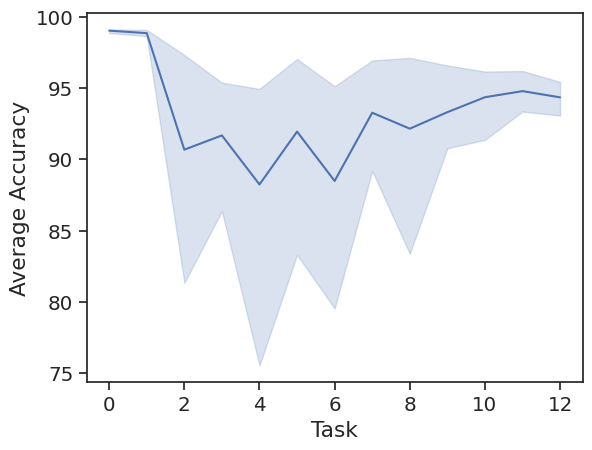

In [236]:
sns.lineplot( data_ewc,  x='Task', y='Average Accuracy')

In [237]:
data_ewc.groupby(['Approach', 'Task']).mean().apply(lambda x: round(x, 2))

Average Accuracy  Average Forgetting
Approach Task                                      
EWC      0                99.04                 NaN
         1                98.86                0.56
         2                90.68               12.60
         3                91.68               10.02
         4                88.24               13.11
         5                91.95                8.17
         6                88.49               11.92
         7                93.28                6.29
         8                92.16                7.48
         9                93.31                6.16
         10               94.36                4.69
         11               94.79                4.27
         12               94.36                4.78

In [238]:
path_lwm = '/home/karokaro/research-repositories/FACIL/results/emnist_lwm_final_emnist'

In [239]:
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(path_lwm) if isfile(join(path_lwm, f))]
onlyfiles

['args-2025-01-24-15-36.txt',
 'stdout-2025-01-24-17-35.txt',
 'args-2025-01-24-15-15.txt',
 'raw_log-2025-01-24-17-15.txt',
 'stdout-2025-01-24-16-52.txt',
 'stdout-2025-01-24-17-15.txt',
 'raw_log-2025-01-24-15-36.txt',
 'stdout-2025-01-24-16-31.txt',
 'stderr-2025-01-24-17-57.txt',
 'raw_log-2025-01-24-16-52.txt',
 'args-2025-01-24-17-57.txt',
 'stderr-2025-01-24-17-15.txt',
 'stderr-2025-01-24-15-15.txt',
 'args-2025-01-24-16-52.txt',
 'stderr-2025-01-24-16-15.txt',
 'raw_log-2025-01-24-16-31.txt',
 'args-2025-01-24-16-15.txt',
 'raw_log-2025-01-24-17-35.txt',
 'stdout-2025-01-24-15-36.txt',
 'stderr-2025-01-24-17-35.txt',
 'stderr-2025-01-24-16-52.txt',
 'args-2025-01-24-16-31.txt',
 'args-2025-01-24-15-54.txt',
 'raw_log-2025-01-24-15-15.txt',
 'raw_log-2025-01-24-17-57.txt',
 'stderr-2025-01-24-15-36.txt',
 'args-2025-01-24-17-15.txt',
 'raw_log-2025-01-24-16-15.txt',
 'stderr-2025-01-24-16-31.txt',
 'args-2025-01-24-17-35.txt',
 'stdout-2025-01-24-15-15.txt',
 'raw_log-2025-01-

In [240]:
args = [file for file in onlyfiles if 'args' in file ]
len(args)

9

In [241]:
import json
arg_dict = {}
for file in args:
    with open(join(path_lwm, file), 'r') as f:
        # regex time! we need only the timestamp of the file
        name = file.split('args-')[1]
        arg_dict[name] = json.loads(f.read())

In [242]:
import json

logs = [file for file in onlyfiles if 'raw_log' in file ]

res_dict = {}
for file in logs:
    with open(join(path_lwm, file), 'r') as f:
        name = file.split('raw_log-')[1]
        res_dict[name] = []
        for line in f:
            res_dict[name].append(json.loads(line.strip()))

In [243]:
import numpy as np
seeds = [0, 1, 2]
for seed in seeds:
    small = [key for key in arg_dict if arg_dict[key]["seed"]==seed]
    arg_means = {key:[np.mean([k["value"] for k in res_dict[key] if k["name"]=="acc_tag" and k["group"]=="test" and k["task"] == i]) for i in [12]] for key in small}
    max_key = max(arg_means, key=arg_means.get)
    small.remove(max_key)
    for key in small:
        res_dict.pop(key)
        arg_dict.pop(key)

In [244]:
import pandas as pd
import numpy as np
from itertools import chain
data_lwm = pd.DataFrame({'Approach': list(chain.from_iterable([['LWM' for i in range(13)] for key in res_dict.keys()])),
                     'Task': list(chain.from_iterable([[i for i in range(13)] for key in res_dict.keys()])),
                     'Average Accuracy': list(chain.from_iterable([[np.mean([k["value"] for k in res_dict[key] if k["name"]=="acc_taw" and k["group"]=="test" and k["task"] == i]) for i in range(13)] for key in res_dict.keys()])),
                     'Average Forgetting': list(chain.from_iterable([[np.mean([k["value"] for k in res_dict[key] if k["name"]=="forg_taw" and k["group"]=="test" and k["task"] == i and k["iter"] != k["task"]]) for i in range(13)] for key in res_dict.keys()]))})

/home/karokaro/research-repositories/FACIL/venv/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/karokaro/research-repositories/FACIL/venv/lib/python3.11/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


<Axes: xlabel='Task', ylabel='Average Accuracy'>

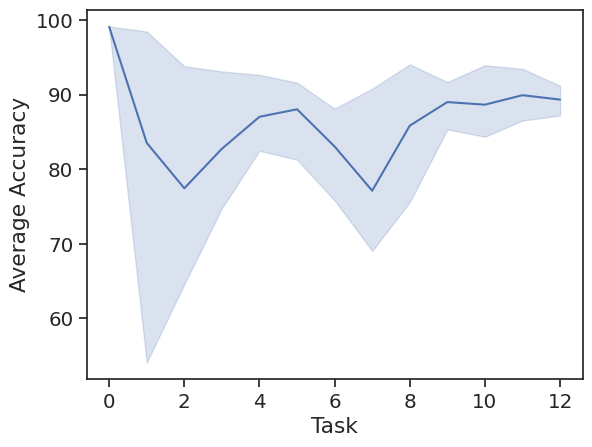

In [245]:
sns.lineplot( data_lwm,  x='Task', y='Average Accuracy')

In [246]:
data_lwm.groupby(['Approach', 'Task']).mean().apply(lambda x: round(x, 2))

Average Accuracy  Average Forgetting
Approach Task                                      
LWM      0                99.08                 NaN
         1                83.52               14.65
         2                77.44               13.66
         3                82.73                9.45
         4                87.02                4.71
         5                88.02                6.21
         6                83.04               13.27
         7                77.11               20.25
         8                85.83               10.46
         9                88.99                7.41
         10               88.64                7.75
         11               89.91                6.64
         12               89.32                7.54

In [247]:
path_icarl = '/home/karokaro/research-repositories/FACIL/results/emnist_icarl_final_emnist'

In [248]:
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(path_icarl) if isfile(join(path_icarl, f))]
onlyfiles

['stderr-2025-01-21-01-09.txt',
 'stderr-2025-01-21-00-33.txt',
 'raw_log-2025-01-21-01-48.txt',
 'args-2025-01-20-23-57.txt',
 'stdout-2025-01-20-22-49.txt',
 'args-2025-01-21-02-29.txt',
 'raw_log-2025-01-21-02-29.txt',
 'stdout-2025-01-20-23-21.txt',
 'stdout-2025-01-20-21-42.txt',
 'raw_log-2025-01-20-22-14.txt',
 'raw_log-2025-01-20-22-49.txt',
 'raw_log-2025-01-21-01-09.txt',
 'stderr-2025-01-20-21-42.txt',
 'args-2025-01-20-22-14.txt',
 'stderr-2025-01-20-23-21.txt',
 'args-2025-01-21-01-48.txt',
 'args-2025-01-20-21-42.txt',
 'stderr-2025-01-20-23-57.txt',
 'stdout-2025-01-21-01-48.txt',
 'raw_log-2025-01-20-21-42.txt',
 'stderr-2025-01-21-01-48.txt',
 'stdout-2025-01-20-22-14.txt',
 'stdout-2025-01-21-02-29.txt',
 'stdout-2025-01-21-00-33.txt',
 'args-2025-01-20-23-21.txt',
 'stderr-2025-01-20-22-14.txt',
 'args-2025-01-21-01-09.txt',
 'args-2025-01-21-00-33.txt',
 'raw_log-2025-01-20-23-57.txt',
 'stdout-2025-01-21-01-09.txt',
 'args-2025-01-20-22-49.txt',
 'stderr-2025-01-20

In [249]:
args = [file for file in onlyfiles if 'args' in file ]
len(args)

9

In [250]:
import json
arg_dict = {}
for file in args:
    with open(join(path_icarl, file), 'r') as f:
        # regex time! we need only the timestamp of the file
        name = file.split('args-')[1]
        arg_dict[name] = json.loads(f.read())

In [251]:
import json

logs = [file for file in onlyfiles if 'raw_log' in file ]

res_dict = {}
for file in logs:
    with open(join(path_icarl, file), 'r') as f:
        name = file.split('raw_log-')[1]
        res_dict[name] = []
        for line in f:
            res_dict[name].append(json.loads(line.strip()))

In [252]:
import numpy as np
seeds = [0, 1, 2]
for seed in seeds:
    small = [key for key in arg_dict if arg_dict[key]["seed"]==seed]
    arg_means = {key:[np.mean([k["value"] for k in res_dict[key] if k["name"]=="acc_tag" and k["group"]=="test" and k["task"] == i]) for i in [12]] for key in small}
    max_key = max(arg_means, key=arg_means.get)
    small.remove(max_key)
    for key in small:
        res_dict.pop(key)
        arg_dict.pop(key)

In [253]:
import pandas as pd
import numpy as np
from itertools import chain
data_icarl = pd.DataFrame({'Approach': list(chain.from_iterable([['iCaRL' for i in range(13)] for key in res_dict.keys()])),
                     'Task': list(chain.from_iterable([[i for i in range(13)] for key in res_dict.keys()])),
                     'Average Accuracy': list(chain.from_iterable([[np.mean([k["value"] for k in res_dict[key] if k["name"]=="acc_taw" and k["group"]=="test" and k["task"] == i]) for i in range(13)] for key in res_dict.keys()])),
                     'Average Forgetting': list(chain.from_iterable([[np.mean([k["value"] for k in res_dict[key] if k["name"]=="forg_taw" and k["group"]=="test" and k["task"] == i and k["iter"] != k["task"]]) for i in range(13)] for key in res_dict.keys()]))})

/home/karokaro/research-repositories/FACIL/venv/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/karokaro/research-repositories/FACIL/venv/lib/python3.11/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [254]:
data_icarl.groupby(['Approach', 'Task']).mean().apply(lambda x: round(x, 2))

Average Accuracy  Average Forgetting
Approach Task                                      
iCaRL    0                98.44                 NaN
         1                98.16                0.71
         2                98.01                0.59
         3                97.38                1.52
         4                96.70                1.47
         5                95.71                2.13
         6                94.91                2.57
         7                95.05                2.57
         8                95.17                1.90
         9                94.80                2.32
         10               94.31                2.25
         11               94.90                1.83
         12               95.18                1.67

In [255]:
path_rere = '/home/karokaro/research-repositories/FACIL/results/emnist_rere_lrp_final_emnist'

In [256]:
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(path_rere) if isfile(join(path_rere, f))]
onlyfiles

['stderr-2025-01-25-12-33.txt',
 'stderr-2025-01-24-01-52.txt',
 'stderr-2025-01-27-05-19.txt',
 'args-2025-01-27-05-19.txt',
 'args-2025-01-25-12-33.txt',
 'stdout-2025-01-25-02-23.txt',
 'stdout-2025-01-23-13-17.txt',
 'raw_log-2025-01-26-18-46.txt',
 'args-2025-01-25-22-03.txt',
 'stdout-2025-01-25-22-03.txt',
 'args-2025-01-24-01-52.txt',
 'raw_log-2025-01-24-01-52.txt',
 'stdout-2025-01-27-05-19.txt',
 'args-2025-01-26-18-46.txt',
 'stderr-2025-01-24-14-05.txt',
 'args-2025-01-25-02-23.txt',
 'raw_log-2025-01-27-05-19.txt',
 'stdout-2025-01-26-08-17.txt',
 'raw_log-2025-01-25-02-23.txt',
 'raw_log-2025-01-25-22-03.txt',
 'args-2025-01-24-14-05.txt',
 'stdout-2025-01-24-14-05.txt',
 'stdout-2025-01-24-01-52.txt',
 'raw_log-2025-01-24-14-05.txt',
 'stderr-2025-01-26-08-17.txt',
 'stdout-2025-01-25-12-33.txt',
 'stderr-2025-01-23-13-17.txt',
 'args-2025-01-26-08-17.txt',
 'stderr-2025-01-26-18-46.txt',
 'stdout-2025-01-26-18-46.txt',
 'raw_log-2025-01-26-08-17.txt',
 'raw_log-2025-01

In [257]:
args = [file for file in onlyfiles if 'args' in file ]
len(args)

9

In [258]:
import json
arg_dict = {}
for file in args:
    with open(join(path_rere, file), 'r') as f:
        # regex time! we need only the timestamp of the file
        name = file.split('args-')[1]
        arg_dict[name] = json.loads(f.read())

In [259]:
import json

logs = [file for file in onlyfiles if 'raw_log' in file ]

res_dict = {}
for file in logs:
    with open(join(path_rere, file), 'r') as f:
        name = file.split('raw_log-')[1]
        res_dict[name] = []
        for line in f:
            res_dict[name].append(json.loads(line.strip()))

In [260]:
import numpy as np
seeds = [0, 1, 2]
for seed in seeds:
    small = [key for key in arg_dict if arg_dict[key]["seed"]==seed]
    arg_means = {key:[np.mean([k["value"] for k in res_dict[key] if k["name"]=="acc_tag" and k["group"]=="test" and k["task"] == i]) for i in [12]] for key in small}
    max_key = max(arg_means, key=arg_means.get)
    small.remove(max_key)
    for key in small:
        res_dict.pop(key)
        arg_dict.pop(key)

In [261]:
data_rere = pd.DataFrame({'Approach': list(chain.from_iterable([['ReReLRP' for i in range(13)] for key in res_dict.keys()])),
                     'Task': list(chain.from_iterable([[i for i in range(13)] for key in res_dict.keys()])),
                     'Average Accuracy': list(chain.from_iterable([[np.mean([k["value"] for k in res_dict[key] if k["name"]=="acc_taw" and k["group"]=="test" and k["task"] == i]) for i in range(13)] for key in res_dict.keys()])),
                     'Average Forgetting': list(chain.from_iterable([[np.mean([k["value"] for k in res_dict[key] if k["name"]=="forg_taw" and k["group"]=="test" and k["task"] == i and k["iter"] != k["task"]]) for i in range(13)] for key in res_dict.keys()]))})

/home/karokaro/research-repositories/FACIL/venv/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/karokaro/research-repositories/FACIL/venv/lib/python3.11/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


<Axes: xlabel='Task', ylabel='Average Accuracy'>

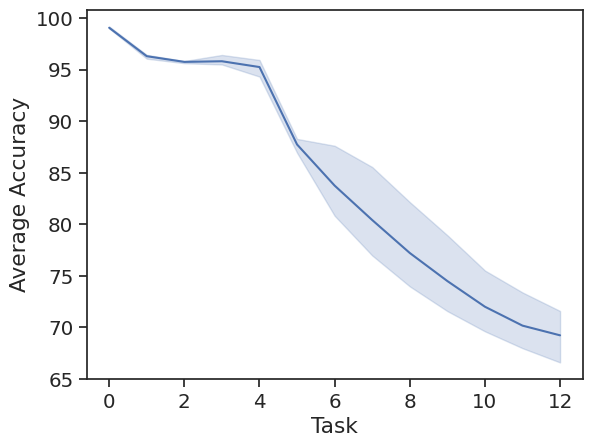

In [262]:
sns.lineplot( data_rere,  x='Task', y='Average Accuracy')

In [263]:
data_rere.groupby(['Approach', 'Task']).mean().apply(lambda x: round(x, 2))

Average Accuracy  Average Forgetting
Approach Task                                      
ReReLRP  0                99.06                 NaN
         1                96.30                2.15
         2                95.75                1.07
         3                95.81                0.72
         4                95.25                0.54
         5                87.74                0.43
         6                83.75                0.36
         7                80.41                0.31
         8                77.22                0.27
         9                74.50                0.24
         10               72.01                0.21
         11               70.17                0.20
         12               69.23                0.18

In [264]:
path_lwm = '/home/karokaro/research-repositories/FACIL/results/emnist_joint_final_emnist'

In [265]:
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(path_lwm) if isfile(join(path_lwm, f))]
onlyfiles

['stderr-2025-01-19-17-41.txt',
 'stdout-2025-01-19-21-03.txt',
 'raw_log-2025-01-19-20-29.txt',
 'raw_log-2025-01-19-18-45.txt',
 'stderr-2025-01-19-18-45.txt',
 'raw_log-2025-01-19-21-03.txt',
 'args-2025-01-19-21-03.txt',
 'stdout-2025-01-19-21-59.txt',
 'raw_log-2025-01-19-22-54.txt',
 'stdout-2025-01-19-19-54.txt',
 'stderr-2025-01-19-20-29.txt',
 'raw_log-2025-01-19-17-41.txt',
 'stdout-2025-01-19-22-54.txt',
 'args-2025-01-19-22-54.txt',
 'stdout-2025-01-19-17-41.txt',
 'args-2025-01-19-18-45.txt',
 'raw_log-2025-01-19-19-54.txt',
 'stdout-2025-01-19-19-18.txt',
 'stderr-2025-01-19-19-54.txt',
 'stderr-2025-01-19-22-54.txt',
 'raw_log-2025-01-19-21-59.txt',
 'stderr-2025-01-19-19-18.txt',
 'stdout-2025-01-19-18-13.txt',
 'args-2025-01-19-18-13.txt',
 'stderr-2025-01-19-21-03.txt',
 'stderr-2025-01-19-18-13.txt',
 'raw_log-2025-01-19-19-18.txt',
 'stdout-2025-01-19-20-29.txt',
 'args-2025-01-19-20-29.txt',
 'stderr-2025-01-19-21-59.txt',
 'stdout-2025-01-19-18-45.txt',
 'args-202

In [266]:
args = [file for file in onlyfiles if 'args' in file ]
len(args)

9

In [267]:
import json
arg_dict = {}
for file in args:
    with open(join(path_lwm, file), 'r') as f:
        # regex time! we need only the timestamp of the file
        name = file.split('args-')[1]
        arg_dict[name] = json.loads(f.read())

In [268]:
import json

logs = [file for file in onlyfiles if 'raw_log' in file ]

res_dict = {}
for file in logs:
    with open(join(path_lwm, file), 'r') as f:
        name = file.split('raw_log-')[1]
        res_dict[name] = []
        for line in f:
            res_dict[name].append(json.loads(line.strip()))

In [269]:
import numpy as np
seeds = [0, 1, 2]
for seed in seeds:
    small = [key for key in arg_dict if arg_dict[key]["seed"]==seed]
    arg_means = {key:[np.mean([k["value"] for k in res_dict[key] if k["name"]=="acc_tag" and k["group"]=="test" and k["task"] == i]) for i in [12]] for key in small}
    max_key = max(arg_means, key=arg_means.get)
    small.remove(max_key)
    for key in small:
        res_dict.pop(key)
        arg_dict.pop(key)

In [270]:
import pandas as pd
import numpy as np
from itertools import chain
data_joint = pd.DataFrame({'Approach': list(chain.from_iterable([['Joint' for i in range(13)] for key in res_dict.keys()])),
                     'Task': list(chain.from_iterable([[i for i in range(13)] for key in res_dict.keys()])),
                     'Average Accuracy': list(chain.from_iterable([[np.mean([k["value"] for k in res_dict[key] if k["name"]=="acc_taw" and k["group"]=="test" and k["task"] == i]) for i in range(13)] for key in res_dict.keys()])),
                     'Average Forgetting': list(chain.from_iterable([[np.mean([k["value"] for k in res_dict[key] if k["name"]=="forg_taw" and k["group"]=="test" and k["task"] == i and k["iter"] != k["task"]]) for i in range(13)] for key in res_dict.keys()]))})

/home/karokaro/research-repositories/FACIL/venv/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/karokaro/research-repositories/FACIL/venv/lib/python3.11/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


/tmp/ipykernel_17922/2585113533.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot( data_joint,  x='Task', y='Average Accuracy', ci=None)


<Axes: xlabel='Task', ylabel='Average Accuracy'>

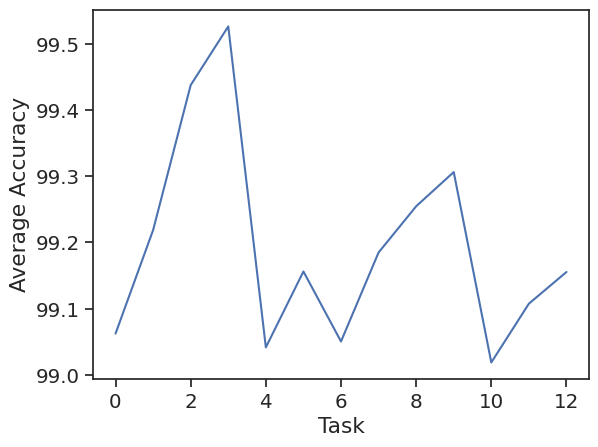

In [271]:
sns.lineplot( data_joint,  x='Task', y='Average Accuracy', ci=None)

In [272]:
data_joint.groupby(['Approach', 'Task']).mean().apply(lambda x: round(x, 2))

Average Accuracy  Average Forgetting
Approach Task                                      
Joint    0                99.06                 NaN
         1                99.22                0.04
         2                99.44               -0.17
         3                99.53               -0.03
         4                99.04               -0.04
         5                99.16               -0.06
         6                99.05                0.03
         7                99.18               -0.01
         8                99.25               -0.01
         9                99.31                0.04
         10               99.02                0.07
         11               99.11                0.05
         12               99.16                0.07

In [273]:
data_all = pd.concat([data, data_ewc, data_icarl, data_rere, data_joint, data_lwm], ignore_index=True)

/tmp/ipykernel_17922/1109856667.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.lineplot( data_all, hue='Approach', x='Task', y='Average Accuracy', hue_order=hue_order, ci=None)


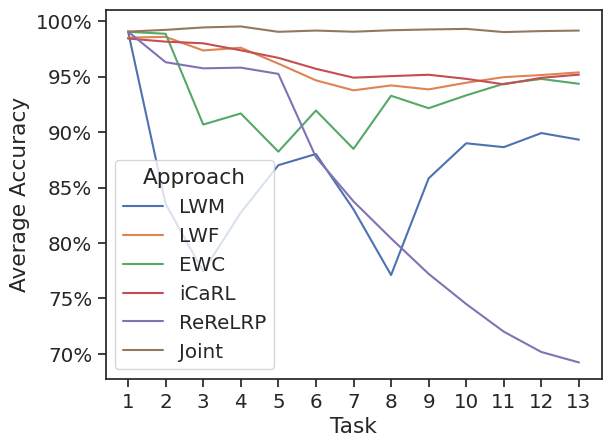

In [274]:
import matplotlib.pyplot as plt
hue_order = ["LWM", "LWF", "EWC", "iCaRL", "ReReLRP", "Joint"]
import matplotlib.pyplot as plt
paletter = sns.color_palette("colorblind", 6)
sns.set_theme(style="ticks", font_scale=1.3) 
g = sns.lineplot( data_all, hue='Approach', x='Task', y='Average Accuracy', hue_order=hue_order, ci=None)
g.set_xticks(range(13))
g.set_xticklabels([i+1 for i in range(13)])
import matplotlib.ticker as mtick
g.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))
plt.savefig("emnist_taw.pdf", format='pdf', bbox_inches='tight')